### EDA(Explatory data analysis on titanic dataset)

## Import libraries

In [78]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
## Load the dataset 
df=sns.load_dataset('titanic')

In [80]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [82]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [83]:
## Check null values and their sum
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [84]:
## Drop the deck column because it contain 688 null values
df.drop(columns=['deck'],inplace=True)

In [85]:
## Fill the missing values in age column by mean 
df['age'].fillna(df['age'].mean(),inplace=True)

In [ ]:
## embark_town contain only 2 null values so I am fill these nul vlaues my taking its mode of the column
df['embark_town'].fillna(df['embark_town'].mode()[0],inplace=True)

In [ ]:
## embarked also contain only 2 null values so I am fill these nul vlaues my taking its mode of the column
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

In [88]:
### Check duplicated rows
df.duplicated().sum()

111

In [89]:
## Drop duplicated values
df.drop_duplicates(inplace=True)

In [ ]:
## After cleaning check null values 
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

### Bar plot

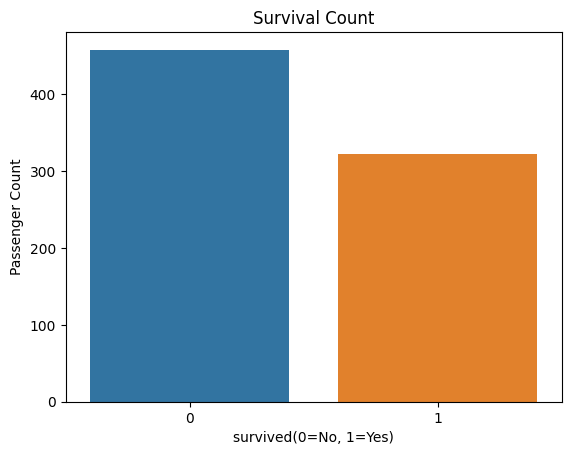

In [91]:
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.xlabel('survived(0=No, 1=Yes)')
plt.ylabel('Passenger Count')
plt.show()

### Histogram

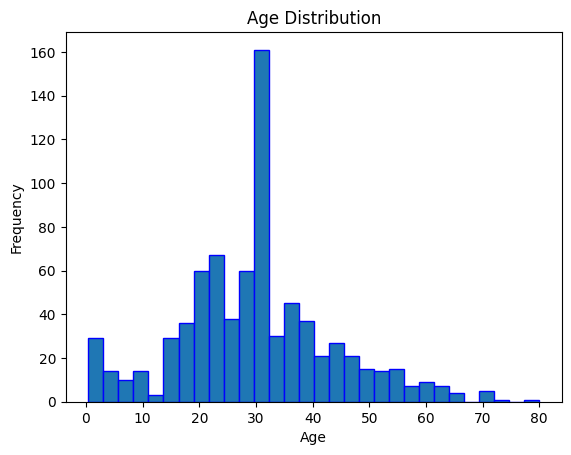

In [92]:
df['age'].plot.hist(bins=30,edgecolor='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Box plot

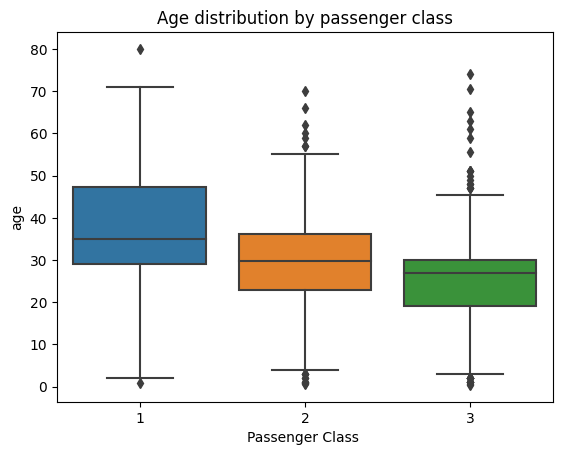

In [93]:
sns.boxplot(x='pclass', y='age',data=df)
plt.title('Age distribution by passenger class')
plt.xlabel('Passenger Class ')
plt.ylabel('age')
plt.show()

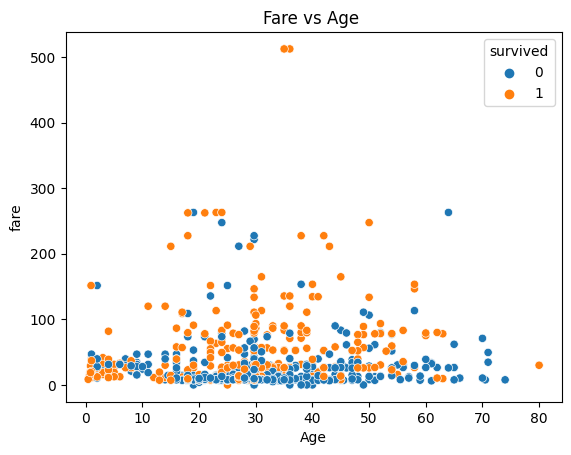

In [94]:
sns.scatterplot(x='age',y='fare',hue='survived',data=df)
plt.title('Fare vs Age ')
plt.xlabel('Age')
plt.ylabel('fare')
plt.show()

### Correlation between numarical Columns

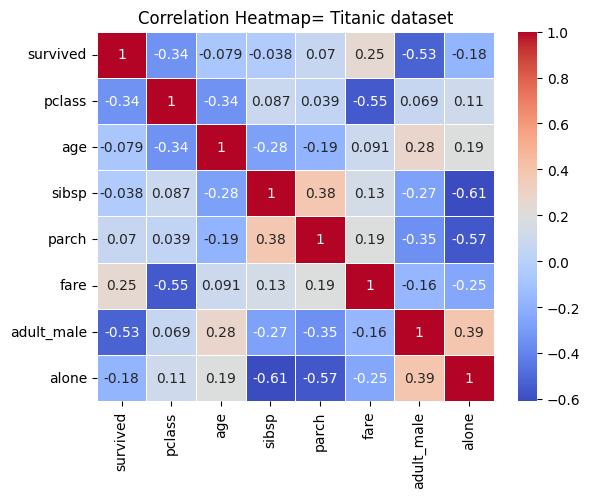

In [95]:
correlation_matrix=df.corr(numeric_only=True)
plt.Figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap= Titanic dataset')
plt.show()